<a href="https://colab.research.google.com/github/Jack3690/Kugelblitz/blob/main/ScienceExercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SDSS Marvin on Colab**

In [1]:
!pip install sdss-marvin --quiet

     |████████████████████████████████| 393 kB 28.0 MB/s 
     |████████████████████████████████| 284 kB 56.6 MB/s 
     |████████████████████████████████| 50 kB 5.1 MB/s 
     |████████████████████████████████| 54 kB 2.5 MB/s 
     |████████████████████████████████| 55 kB 3.5 MB/s 
     |████████████████████████████████| 50 kB 5.9 MB/s 
     |████████████████████████████████| 49 kB 5.5 MB/s 
     |████████████████████████████████| 525 kB 58.5 MB/s 
     |████████████████████████████████| 596 kB 52.4 MB/s 
     |████████████████████████████████| 169 kB 55.7 MB/s 
     |████████████████████████████████| 100 kB 7.2 MB/s 
     |████████████████████████████████| 40 kB 5.2 MB/s 
     |████████████████████████████████| 548 kB 32.6 MB/s 
     |████████████████████████████████| 41 kB 299 kB/s 
     |████████████████████████████████| 212 kB 61.7 MB/s 
     |████████████████████████████████| 111 kB 67.1 MB/s 
     |████████████████████████████████| 47 kB 4.5 MB/s 
     |█████████████████████████

In [2]:
!git clone https://github.com/Jack3690/Kugelblitz

Cloning into 'Kugelblitz'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 26 (delta 1), reused 25 (delta 0), pack-reused 0
Unpacking objects: 100% (26/26), done.


# **Configuring Marvin**

In [ ]:
cd Kugelblitz/

In [3]:
!cp -a /sas /root/

!cp -a /sas/map.py /usr/local/lib/python3.7/dist-packages/marvin/utils/plot/

!mkdir  /root/sas/dr16
!cp -a /root/sas/mangawork/manga/ /root/sas/dr16

## **Imports**

In [6]:
import os
import sys
import requests
import warnings
import PIL
import copy

from matplotlib import pyplot as plt
from matplotlib import colors
import seaborn as sb
import matplotlib
import numpy as np
from matplotlib import gridspec
import pandas as pd
import marvin.utils.plot.colorbar as colorbar
from matplotlib.colors import ListedColormap
from IPython.display import clear_output

from marvin.tools.maps import Maps
import marvin.utils.plot.map as mapplot
from astropy.table import Table
import astropy.units as u
from astropy.io import ascii
from astropy.wcs import WCS
from astropy.coordinates import Distance
from astropy.cosmology import WMAP9 as cosmo
from astropy.cosmology import Planck15
from astropy.io import fits
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
if sys.version_info.major == 2:
    from cStringIO import StringIO as stringio
else:
    from io import StringIO as stringio
    from io import BytesIO as bytesio

matplotlib.rcParams['figure.figsize']=(10,10)
matplotlib.rcParams['font.size']=15

#sb.set_style('dark')

/usr/local/lib/python3.7/dist-packages/marvin/core/exceptions.py:51: UserWarning: cannot initiate Sentry error reporting: [Errno 6] No such device or address.
  UserWarning)
[INFO]: No release version set. Setting default to DR15


# **Data**

In [8]:
df = pd.read_csv('MaNGA_Barred_Dataset.csv')
df

,Unnamed: 0,plateifu,mangaid,objra,objdec,T,type,TType-cat,VI_morph,WHAN_Class
0,0,10001-1902,1-48201,134.193923,56.786747,-4.026000,EII,Huertas,S0,LSN
1,1,10001-6103,1-48208,134.008123,57.390964,-3.177000,EII,Huertas,S0,QB
2,2,7443-12701,12-98126,230.507462,43.532341,-0.113000,S0,Huertas,S0,QB
3,3,7443-6104,12-84677,232.158069,42.442017,0.921000,Sab,Huertas,S0,QB
4,4,7495-3704,12-129601,204.586284,26.759743,-3.406000,EII,Huertas,S0,QB
...,...,...,...,...,...,...,...,...,...,...
640,640,9883-12701,1-176644,255.523309,31.797429,-3.511000,EII,Huertas,Spiral,PSF
641,641,9883-12704,1-176925,256.550767,33.555230,2.774000,Sab,Huertas,Spiral,SFBQB
642,642,9883-9102,1-176947,256.641391,33.692983,4.200000,Scd,Huertas,Spiral,SFB
643,643,9888-12701,1-593975,235.475820,28.133979,3.248973,Sab,SDSS-DeepLearning,Spiral,QB


## **Saving to Google Drive**

In [10]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [14]:
!cd /content/gdrive/MyDrive/

# **Maps with Mapplot**

[WARNING]: divide by zero encountered in log10 (RuntimeWarning)
[WARNING]: invalid value encountered in multiply (RuntimeWarning)
[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: invalid value encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


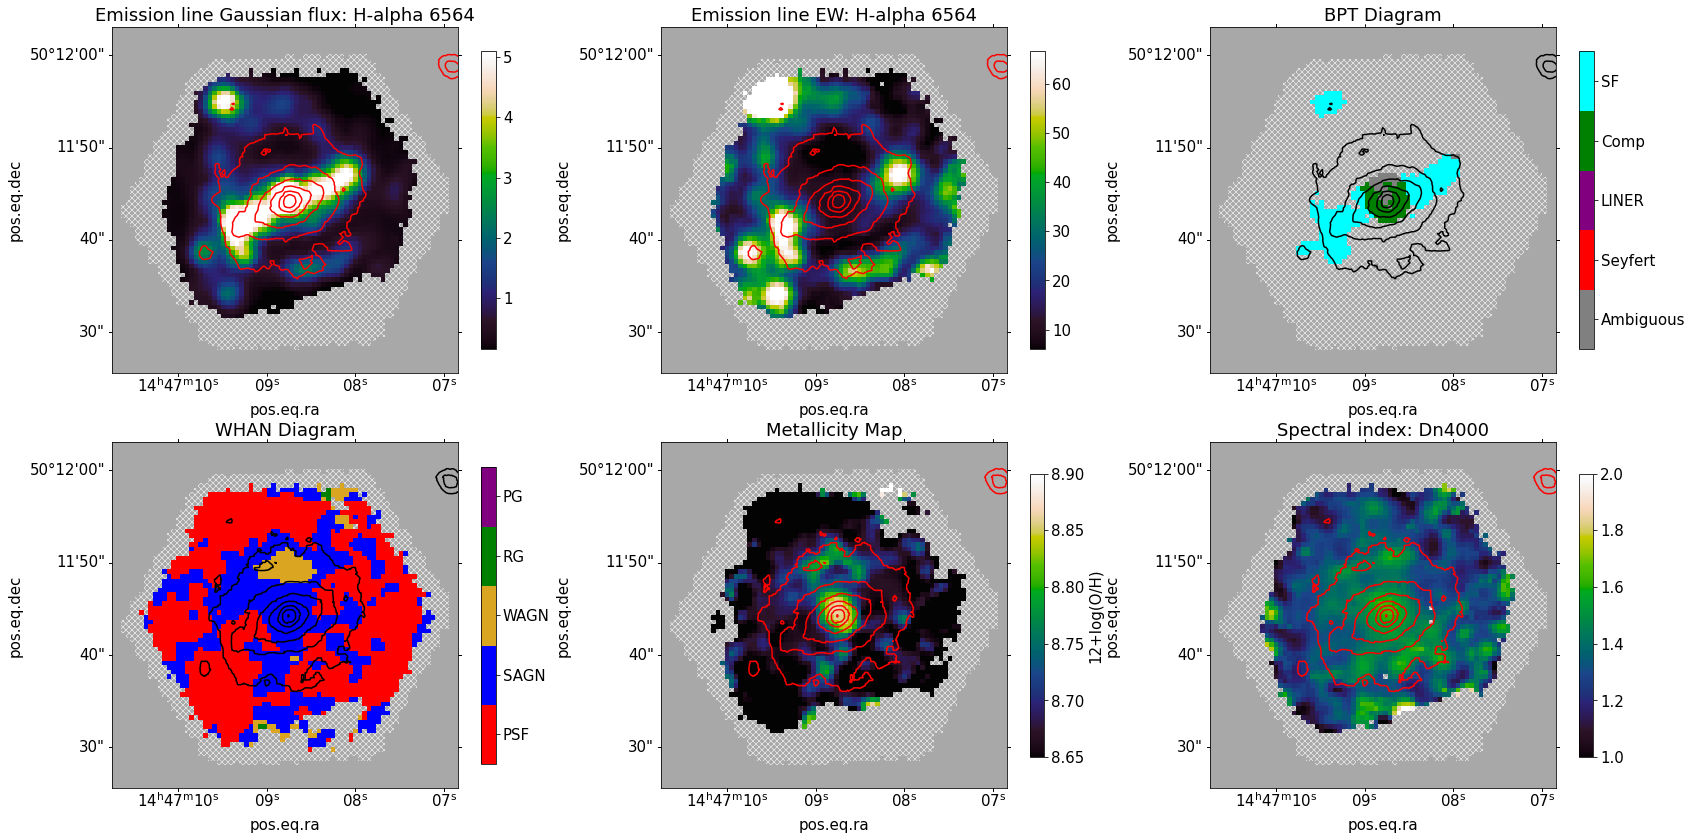

In [26]:
download = 0
format = 'svg'

for plateifu in ['8595-12705'] :
    if not os.path.exists('maps'):
        os.mkdir('maps')    
    
    maps = Maps(plateifu=plateifu)
    mangaid=maps.mangaid
    # Set the size of image cutout 
    scale = maps.wcs.to_header()['PC2_2']*3600
    size = 2*maps.wcs.to_header()['CRPIX1']*scale
    # Get SDSS Image
    optical = maps.getImage()

    # Crop Image to match IFU size
    optical.get_new_cutout(size,size)
    gs = gridspec.GridSpec(2,3) 

    fig=plt.figure(figsize=(27,14))

    filter_r=np.rot90(np.array(optical.data)[:,:,0].T )
    levels=[60.,  90., 120., 150., 180., 210., 240.]


    # H-alpha with optical contours
    ax1 = fig.add_subplot(gs[0,0],projection=maps.wcs,slices=('x','y',0))
    ha = maps.emline_gflux_ha_6564

    ax1.grid(True,which='major')
    fig,ax1,cb=mapplot.plot(dapmap=ha,ax=ax1,fig=fig,return_cb=True)
    ax1.set_autoscale_on(False)
    ax1.contour(filter_r, transform=ax1.get_transform(optical.wcs), colors='red',levels=levels,zorder=11)
    cb.remove()
    cb=plt.colorbar(ax1.get_images()[1],ax=ax1,anchor=(0,5),shrink=0.86)
    ax1.set_xlabel('pos.eq.ra')
    ax1.set_ylabel('pos.eq.dec')
    
    # H alpha EW
    ewha = maps['emline_sew_ha_6564']
    
    ax2 = fig.add_subplot(gs[0,1],projection=maps.wcs,slices=('x','y',0))

    ax2.grid(True,which='major')
    fig,ax2,cb=mapplot.plot(dapmap=ewha,ax=ax2,fig=fig,return_cb=True)
    ax2.set_autoscale_on(False)
    ax2.contour(filter_r, transform=ax2.get_transform(optical.wcs), colors='red',levels=levels,zorder=11)
    cb.remove()
    cb=plt.colorbar(ax2.get_images()[1],ax=ax2,anchor=(0,5),shrink=0.86)
    ax2.set_xlabel('pos.eq.ra')
    ax2.set_ylabel('pos.eq.dec')

    #------------------------------------------------------------------------------------------
    
    mask, fig_bpt, ax_bpt = maps.get_bpt(show_plot=False)

    # Complete the missing lines

    SF = mask['sf']['global'].astype(np.float64)
    COMP = mask['comp']['global'].astype(np.float64)
    SEYF = mask['seyfert']['global'].astype(np.float64)
    LIN = mask['liner']['global'].astype(np.float64)
    AMB = mask['ambiguous']['global'].astype(np.float64)

    # Giving labels to each class

    SF *= 5
    COMP *= 4
    SEYF *= 3
    LIN *= 2
    AMB *= 1

    # Sum the above masks
    bpt = SF + COMP + SEYF + LIN + AMB

    # Let's make a color map for BPT map

    cmap = colors.ListedColormap(['grey','red', 'purple', 'green', 'cyan'])

    # IFU nocov mask
    ha = maps.emline_gew_ha_6564 # For getting pixmask

    nocov = ha.pixmask.get_mask('NOCOV')

    # Plot

    ax3 = fig.add_subplot(gs[0,2],projection=maps.wcs,slices=('x','y',0))
    # Mapplot plot

    fig, ax3, cb = mapplot.plot(value=bpt, ivar = bpt, mask=nocov, cmap=cmap,fig=fig,ax=ax3, use_masks='NOCOV', return_cb=True, cbrange=(0.5, 5.5), title='BPT Diagram')

    ax3.set_autoscale_on(False)

    # Over plot optical contours with black color and given levels

    levels=[60., 90., 120., 150., 180., 210., 240.]

    # Get SDSS image 

    optical = maps.getImage()

    # Prepare for plotting contours

    # Set the size of image cutout

    scale = maps.wcs.to_header()['PC2_2']*3600  # Gives arcsec/ pixel

    size = 2*maps.wcs.to_header()['CRPIX1']*scale # Give angular size in arcseconds

    # Getting new cutout

    optical.get_new_cutout(width = size, height = size)

    filter_r = np.rot90(np.array(optical.data)[:,:,0].T )

    # Remove grid
    ax3.grid(False)

    # Plot contours and transform it with optical.wcs and assign the contours black color with levels = levels and zorder =11
    ax3.contour(filter_r, transform=ax3.get_transform(optical.wcs), colors='black',levels=levels,zorder=11)

    # Remove default colorbar
    cb.remove()
    # Generate new color bar
    cb = plt.colorbar(ax3.get_images()[1],ax=ax3,anchor=(0,5),shrink=0.86)
    cb.set_ticks([1, 2, 3, 4, 5])
    cb.set_ticklabels(['Ambiguous','Seyfert','LINER','Comp', 'SF'])
    # Set x and y label
    ax3.set_xlabel('pos.eq.ra')
    ax3.set_ylabel('pos.eq.dec')


    # WHAN
    nii = maps.emline_gflux_nii_6585  # Get emline gaussian flux of nii with wavelength 6585
    ha = maps.emline_gflux_ha_6564    # Get emline gaussian flux of H alpha  with wavelength 6564
    niiha = nii/ha

    ewha = maps['emline_sew_ha_6564']  # Get emline_sew of H alpha  with wavelength 6564
    ewnii = maps['emline_sew_nii_6585'] # Get emline_sew of nii with wavelength 6585

    # Take the log of the NII/Ha ratio
    logniiha = np.log10(niiha.value)

    # Create the WHAN categories. Hint : Use ewha.value, ewnii.value, and logniiha

    psf = (logniiha < -0.4) & (ewha.value > 3)                        # Pure Star Forming
    sagn = (logniiha > -0.4) & (ewha.value > 6)                       # Strong AGN
    wagn = (logniiha > -0.4) & ((ewha.value > 3) & (ewha.value < 6))  # Weak AGN
    rg = ewha.value < 3                                               # Retired Galaxy  
    pg = (ewha.value < 0.5) & (ewnii.value < 0.5)                     # Passive Galaxy

    # Create a custom array for a WHAN categories (we copy the EW Ha array just to get a 2d-array of the original size)

    value = ewha.value.copy()
    value[psf]  = 1     # pure star-forming 
    value[sagn] = 2     # strong agn
    value[wagn] = 3     # weak agn
    value[rg]   = 4     # retired galaxies
    value[pg]   = 5     # passive galaxies

    # Set ivar to 0 where the SNR < 1
    niiha_low_snr = mapplot.mask_low_snr(niiha.value, niiha.ivar, snr_min=1)
    ewha_low_snr  = mapplot.mask_low_snr(ewha.value, ewha.ivar, snr_min=1)
    ewnii_low_snr = mapplot.mask_low_snr(ewnii.value, ewnii.ivar, snr_min=1)
    low_snr       = np.logical_or(niiha_low_snr, ewha_low_snr, ewnii_low_snr)

    ivar = ewha.value.copy()
    ivar[low_snr] = 0
    value[low_snr] = 6

    #------------------------------------------------------------------------------------------

    # WHAN IFU

    ax4 = fig.add_subplot(gs[1,0],projection=maps.wcs,slices=('x','y',0))
    #  Remove grid
    ax4.grid(False)

    # Create colomap with colors 'red', 'blue', 'goldenrod', 'green', 'purple'
    cmap = colors.ListedColormap(['red', 'blue', 'goldenrod', 'green', 'purple'])

    # Get nocov mask from ewha map

    nocov = ewha.pixmask.get_mask('NOCOV')

    # Complete the mapplot.plot  function call
    fig, ax4, cb = mapplot.plot(value=value, ivar=ivar, mask=nocov, cmap=cmap,fig=fig,ax=ax4, use_masks='NOCOV', return_cb=True, cbrange=(0.5, 5.5), title='WHAN Diagram')

    # Set autoscale to False
    ax4.set_autoscale_on(False)

    # Get SDSS optical image
    optical = maps.getImage()

    # Set the size of image cutout 
    scale = maps.wcs.to_header()['PC2_2']*3600
    size = 2*maps.wcs.to_header()['CRPIX1']*scale

    # Get new cutout with new size
    optical.get_new_cutout(size,size,size/512)

    # Slice the optical image and get r band data
    filter_r=np.rot90(np.array(optical.data)[:,:,0].T )

    # Assign levels [60.,  90., 120., 150., 180., 210., 240.]
    levels = [60.,  90., 120., 150., 180., 210., 240.]

    # Create contour of filter_r and transform it using optical.wcs. Give color = 'black' and zorder=11
    ax4.contour(filter_r, transform=ax4.get_transform(optical.wcs), colors='black',levels=levels,zorder=11)

    # Remove default colorbar
    cb.remove()

    # Create new color bar
    cb=plt.colorbar(ax4.get_images()[1],ax=ax4,anchor=(0,5),shrink=0.86)

    # Set ticks [1, 2, 3, 4, 5]
    cb.set_ticks([1, 2, 3, 4, 5])

    # Set ticklabels ['PSF', 'SAGN', 'WAGN', 'RG', 'PG']
    cb.set_ticklabels(['PSF', 'SAGN', 'WAGN', 'RG', 'PG'])

    # Set axes labels
    ax4.set_xlabel('pos.eq.ra')
    ax4.set_ylabel('pos.eq.dec')
    
    #------------------------------------------------------------------------------------------

    # Metallicity Map
    ax5 = fig.add_subplot(gs[1,1],projection=maps.wcs,slices=('x','y',0))
    nii = maps.emline_gflux_nii_6585
    n2 = nii/ ha
    logn2 = np.log10(n2)
    oh = 8.90 + 0.57 * logn2

    mask_bad_data = n2.pixmask.get_mask(['NOCOV', 'UNRELIABLE', 'DONOTUSE'])
    min_snr = 3.
    mask_nii_low_snr = (np.abs(nii.value * np.sqrt(nii.ivar)) < min_snr)
    mask_ha_low_snr = (np.abs(ha.value * np.sqrt(ha.ivar)) < min_snr)

    mask =  mask_bad_data | mask_nii_low_snr | mask_ha_low_snr
    ax5.grid(True,which='major')
    fig,ax5,cb=mapplot.plot(dapmap=oh,mask=mask,ax=ax5,fig=fig,return_cb=True,cbrange=[8.65,8.9],title='Metallicity Map')
    ax5.set_autoscale_on(False)
    ax5.contour(filter_r, transform=ax5.get_transform(optical.wcs), colors='red',levels=levels,zorder=11)
    cb.remove()
    cb=plt.colorbar(ax5.get_images()[1],ax=ax5,anchor=(0,5),shrink=0.82,label= '12+log(O/H)')
    ax5.set_xlabel('pos.eq.ra')
    ax5.set_ylabel('pos.eq.dec')

     #------------------------------------------------------------------------------------------

    # DN 4000 with optical contours    
    ax6 = fig.add_subplot(gs[1,2],projection=maps.wcs,slices=('x','y',0))

    dn = maps.specindex_dn4000
    ax6.grid(True,which='major')
    fig,ax6,cb=mapplot.plot(dapmap=dn,ax=ax6,fig=fig,return_cb=True,cbrange=[1,2])
    ax6.set_autoscale_on(False)
    ax6.contour(filter_r, transform=ax6.get_transform(optical.wcs), colors='red',levels=levels,zorder=11)
    cb.remove()
    cb=plt.colorbar(ax6.get_images()[1],ax=ax6,anchor=(0,5),shrink=0.82)
    ax6.set_xlabel('pos.eq.ra')
    ax6.set_ylabel('pos.eq.dec')

    fig.suptitle(" ",size=20,va='top',y=0.9)
    plt.subplots_adjust(left=0.1)
    if download:
      fig.savefig(f'maps/{plateifu}maps',bbox_inches = 'tight',format = format)
  
    #------------------------------------------------------------------------------------------
    break
    plt.pause(0.5)

# **Maps with Matplotlib**

In [ ]:
use_masks = ['NOCOV','LOWCOV','DEADFIBER','FORESTAR','NOVALUE','UNRELIABLE','MATHERROR','FITFAILED','NOCORRECTION','MULTICOMP','NEARBOUND','DONOTUSE']
def goodspax(dapmap):
    bad_data = dapmap.pixmask.get_mask(use_masks,dtype = np.bool)
    low_snr = dapmap.value*np.sqrt(dapmap.ivar)<1.0
    mask = np.logical_or.reduce((bad_data, low_snr))
    mask = np.where(mask==True,np.nan,1)
    return dapmap.value*mask

In [ ]:
download = 0
format = 'svg'
for plateifu in df.plateifu:

    if not os.path.exists(f'S0_maps/{plateifu}'):
        os.mkdir(f'maps/{plateifu}')
  
    maps = Maps(plateifu=plateifu,mode='remote')
    mangaid = maps.mangaid

    # Set the size of image cutout 
    scale = maps.wcs.to_header()['PC2_2']*3600
    size = 2*maps.wcs.to_header()['CRPIX1']*scale

    # Get SDSS Image
    optical=maps.getImage()

    # Optical Image
    fig = plt.figure(figsize = (10,10))
    ax1 = fig.add_subplot(projection=optical.wcs)
    ax1.grid(False)
    ax1.imshow(optical.data)
    ax1.grid(False)
    if download:
        fig.savefig(f'maps/{plateifu}/SDSS_cutout',bbox_inches = 'tight',format=format)
    
    #------------------------------------------------------------------------------------------
    
    # Crop Image to match IFU size

    optical.get_new_cutout(size,size)
    filter_r=np.rot90(np.array(optical.data)[:,:,0].T )
    levels=[60.,  90., 120., 150., 180., 210., 240.]
    
  # H-alpha with optical contours

    fig = plt.figure(figsize = (10,10))
    ax3 = fig.add_subplot( projection=maps.wcs,slices=('x','y',0))
    ha = maps.emline_gflux_ha_6564

    ax3.grid(False)
    cbr = mapplot.plot(dapmap=ha,return_cbrange=True)
    img = ax3.imshow(goodspax(ha),vmin=cbr[0],vmax=cbr[1],cmap='jet')
    ax3.grid(False)
    ax3.set_autoscale_on(False)
    ax3.contour(filter_r, transform=ax3.get_transform(optical.wcs), colors='red',levels=levels,zorder=11)
    ax3.annotate(r'H alpha Map',(len(ha)-len(ha)/3.5,len(ha)-len(ha)/13),weight='bold',family='serif')
    cb=plt.colorbar(img,ax=ax3,anchor=(0,5),shrink=0.824)
    cb.set_label(r'$1\times10^{-17}ergcm^{-2}s^{-1}$')
    ax3.set_xlabel('pos.eq.ra')
    ax3.set_ylabel('pos.eq.dec')

    if download:
        fig.savefig(f'maps/{plateifu}/H_alpha',bbox_inches = 'tight',format = format)
    #------------------------------------------------------------------------------------------

    # WHAN Map

    # grab the NII/Ha flux ratio, Ha and NII equivalent width arrays
    nii=maps.emli40ne_gflux_nii_6585
    ha=maps.emline_gflux_ha_6564
    niiha = nii/ha
    ewha = maps['emline_sew_ha_6564']
    ewnii = maps['emline_sew_nii_6585']
    # take the log of the NII/Ha ratio
    logniiha = np.log10(niiha.value)

    # create the WHAN categories
    psf = (logniiha < -0.4) & (ewha.value > 3)
    sagn = (logniiha > -0.4) & (ewha.value > 6)
    wagn = (logniiha > -0.4) & ((ewha.value > 3) & (ewha.value < 6))
    rg = ewha.value < 3
    pg = (ewha.value < 0.5) & (ewnii.value < 0.5) 

    # create a custom array for a WHAN categories (we copy the EW Ha array just to get a 2d-array of the original size)
    value = ewha.value.copy()
    value[psf]  = 1     # pure star-forming 
    value[sagn] = 2     # strong agn
    value[wagn] = 3     # weak agn
    value[rg]   = 4     # retired galaxies
    value[pg]   = 5     # passive galaxies

    # Set ivar to 0 where the SNR < 1
    niiha_low_snr = mapplot.mask_low_snr(niiha.value, niiha.ivar, snr_min=1)
    ewha_low_snr = mapplot.mask_low_snr(ewha.value, ewha.ivar, snr_min=1)
    ewnii_low_snr = mapplot.mask_low_snr(ewnii.value, ewnii.ivar, snr_min=1)
    low_snr = np.logical_or(niiha_low_snr, ewha_low_snr, ewnii_low_snr)

    ivar = ewha.value.copy()
    ivar[low_snr] = 0
    value[low_snr] = np.nan

    # Set the size of image cutout 
    scale = maps.wcs.to_header()['PC2_2']*3600
    size = 2*maps.wcs.to_header()['CRPIX1']*scale

    # WHAN IFU
    fig = plt.figure(figsize = (10,10))
    ax2 = fig.add_subplot(projection=maps.wcs,slices=('x','y',0))
    ax2.grid(False)
    cmap = colors.ListedColormap(['red', 'blue', 'goldenrod', 'green', 'purple'])
    nocov = ewha.pixmask.get_mask('NOCOV',dtype=np.bool)
    mask = np.where(nocov==True,np.nan,1)
    #fig, ax2, cb = mapplot.plot(value=value, ivar=ivar, mask=nocov, cmap=cmap,fig=fig,ax=ax2, use_masks='NOCOV', return_cb=True, cbrange=(0.5, 5.5), title='')
    img = ax2.imshow(value,cmap=cmap,vmin=0.5,vmax=5.5)
    ax2.grid(False)
    ax2.set_autoscale_on(False)
    ax2.annotate(r'WHAN Map',(len(ha)-len(ha)/4,len(ha)-len(ha)/13),weight='bold',family='serif')

    filter_r=np.rot90(np.array(optical.data)[:,:,0].T )
    levels=[60.,  90., 120., 150., 180., 210., 240.]
    ax2.contour(filter_r, transform=ax2.get_transform(optical.wcs), colors='black',levels=levels,zorder=11)

    cb=plt.colorbar(img,ax=ax2,anchor=(0,5),shrink=0.825)
    cb.set_ticks([1, 2, 3, 4, 5])
    cb.set_ticklabels(['PSF', 'SAGN', 'WAGN', 'RG', 'PG'])
    ax2.set_xlabel('pos.eq.ra')
    ax2.set_ylabel('pos.eq.dec')
    
    if download:
        fig.savefig(f'S0_maps/{plateifu}/WHAN',bbox_inches = 'tight',format=format)
    #------------------------------------------------------------------------------------------
    
    fig = plt.figure(figsize = (10,10))
    ax4 = fig.add_subplot(projection=maps.wcs,slices=('x','y',0))
    m, f ,a = maps.get_bpt(show_plot=False)
    
    SF = sf= m['sf']['global'].astype('float64')*5
    COMP = m['comp']['global'].astype('float64')*4
    LIN = m['liner']['global'].astype('float64')*3
    SEY = m['seyfert']['global'].astype('float64')*2
    AMB = m['ambiguous']['global'].astype('float64')*1
    
    bpt = SF + COMP + LIN + SEY + AMB
    
    cmap = colors.ListedColormap(['grey','red', 'purple', 'green', 'cyan'])
    nocov = ewha.pixmask.get_mask('NOCOV')
    
    bpt[bpt==0]=np.nan
    
    #fig, ax4, cb = mapplot.plot(value=bpt, ivar = bpt, mask=nocov, cmap=cmap,fig=fig,ax=ax4, use_masks='NOCOV', return_cb=True, cbrange=(0.5, 5.5), title='')
    img = ax4.imshow(bpt,cmap=cmap,vmin=0.5,vmax=5.5)
    ax4.set_autoscale_on(False)
    ax4.contour(filter_r, transform=ax4.get_transform(optical.wcs), colors='black',levels=levels,zorder=11)

    cb=plt.colorbar(img,ax=ax4,anchor=(0,5),shrink=0.825)
    cb.set_ticks([1, 2, 3, 4, 5])
    cb.set_ticklabels(['Ambiguous','Seyfert','LINER','Comp', 'SF'])
    ax4.set_xlabel('pos.eq.ra')
    ax4.set_ylabel('pos.eq.dec')
    ax4.annotate(r'BPT Map',(len(ha)-len(ha)/4.6,len(ha)-len(ha)/12),weight='bold',family='serif')

    if download:
        fig.savefig(f'S0_maps/{plateifu}/BPT',bbox_inches = 'tight', format = format)
  
    #------------------------------------------------------------------------------------------

    dn=maps.specindex_dn4000

    fig = plt.figure(figsize = (10,10))
    ax4 = fig.add_subplot(projection=maps.wcs,slices=('x','y',0))
    ax4.grid(False)
    cbr=mapplot.plot(dapmap=dn,return_cbrange=True)
    img = ax4.imshow(goodspax(dn),vmin=cbr[0],vmax=cbr[1],cmap='jet')
    ax4.grid(False)
    ax4.set_autoscale_on(False)
    ax4.contour(filter_r, transform=ax4.get_transform(optical.wcs), colors='red',levels=levels,zorder=11)
    cb=plt.colorbar(img,ax=ax4,anchor=(0,5),shrink=0.824)
    ax4.set_xlabel('pos.eq.ra')
    ax4.set_ylabel('pos.eq.dec')
    ax4.annotate(r'Dn 4000 Map',(len(ha)-len(ha)/3.3,len(ha)-len(ha)/13),weight='bold',family='serif')
    if download:
        fig.savefig(f'S0_maps/{plateifu}/DN4000',bbox_inches = 'tight',format = format)
        
    #------------------------------------------------------------------------------------------
    fig = plt.figure(figsize = (10,10))
    ax3 = fig.add_subplot(projection=maps.wcs,slices=('x','y',0))
    nii = maps.emline_gflux_nii_6585
    n2 = nii/ ha
    logn2 = np.log10(n2)
    logoh = 8.90 + 0.57 * logn2

    mask_bad_data = n2.pixmask.get_mask(['NOCOV', 'UNRELIABLE', 'DONOTUSE'])
    min_snr = 3.
    mask_nii_low_snr = (np.abs(nii.value * np.sqrt(nii.ivar)) < min_snr)
    mask_ha_low_snr = (np.abs(ha.value * np.sqrt(ha.ivar)) < min_snr)

    mask =  (mask_bad_data | mask_nii_low_snr | mask_ha_low_snr).astype(np.bool)
    ax3.grid(False)
    cbr = mapplot.plot(dapmap=logoh,mask=mask,return_cbrange=True)
    mask = np.where(mask==True,np.nan,1)
    img = ax3.imshow(logoh.value*mask,vmin=cbr[0],vmax=cbr[1],cmap = 'viridis')
    ax3.grid(False)
    ax3.set_autoscale_on(False)
    ax3.contour(filter_r, transform=ax3.get_transform(optical.wcs), colors='red',levels=levels,zorder=11)
    cb=plt.colorbar(img,ax=ax3,anchor=(0,5),shrink=0.825,label= '12+log(O/H)')
    ax3.set_xlabel('pos.eq.ra')
    ax3.set_ylabel('pos.eq.dec')
    ax3.annotate(r'N2 Metallicity Map',(len(ha)-len(ha)/2.5,len(ha)-len(ha)/13),weight='bold',family='serif')
    if download:
        fig.savefig(f'S0_maps/{plateifu}/Metallicity',bbox_inches = 'tight',format = format)
        
   #------------------------------------------------------------------------------------------
    
    hb = maps.emline_gflux_hb_4862
    ha_hb = maps.getMapRatio('emline_gflux','ha_6564','hb_4862')
    ha_sf    = ha*sf
    hb_sf    = hb*sf
    ha_hb_sf = ha_hb*sf
    
    z = maps.dapall['z']

    fa = ha_sf*1e-17*pow(10,2.468*0.934*np.log10(ha_hb_sf.value/2.86))

    D_L = cosmo.luminosity_distance(z).to(u.cm)

    Lha =  (fa.value*4*np.pi*D_L*D_L)*(u.erg/u.second)

    SFR = 5.5e-42*Lha

    SFR = SFR.value*(u.solMass/u.year)

    ang_dist = Planck15.kpc_proper_per_arcmin(z).to(u.kpc/u.arcsec)

    area = (ang_dist.value**2*maps.bin_area.value)

    area = area*(u.kpc**2)

    SFRD = SFR/area

    R = maps.spx_ellcoo_elliptical_radius.value
    R_e=float(maps.header['reff'])

    x = (R/R_e)
    y = SFRD
    
    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot()
    ax.scatter(x,y)
    ax.set_xlabel(r'$R/R_e$')
    ax.set_ylabel('SFRD ' + r'$M_{\odot}kpc^{-2}yr^{-1}$')
    
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())

    ax.tick_params(which='both', width=2,direction="in")
    ax.tick_params(which='major', length=7,direction="in")
    ax.tick_params(which='minor', length=4, color='black',direction="in")
    
    if 0:
        fig.savefig(f'S0_maps/{plateifu}/SFRD',bbox_inches = 'tight',format = format)
    
   #------------------------------------------------------------------------------------------
    
   # Specific SFR/ log M
    
    cube =  maps.getCube()
    M = cube.vacs.firefly._make_map('stellar_mass')
    
    mask = None
    mask = (M < -10) if not mask else mask
    masked_array = np.ma.array(M, mask=mask) #log(M)
    
    ssfr = SFR.value/10**(masked_array)
    ssfr = np.log10(ssfr)
    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(projection=maps.wcs,slices=('x','y',0))
    
    #fig, ax, cb = mapplot.plot(value=ssfr, ivar = ssfr, mask=nocov, fig=fig, ax= ax,cmap='RdYlBu_r', use_masks='NOCOV', return_cb=True)
    mask = mask.astype(np.bool)
    mask = np.where(mask==True,np.nan,1)
    ax.grid(False)
    img = ax.imshow(ssfr*mask, cmap = 'RdYlBu_r')
    ax.grid(False)
    ax.set_autoscale_on(False)
    ax.contour(filter_r, transform=ax.get_transform(optical.wcs), colors='black',levels=levels,zorder=11)
    
    # plot the colour bar
    cbar = fig.colorbar(img, ax=ax,anchor=(0,5),shrink=0.824)
    cbar.set_label(r'$log(sSFR (yr^{-1}))$')
    ax.set_xlabel('pos.eq.ra')
    ax.set_ylabel('pos.eq.dec')
    ax.annotate(r'sSFR Map',(len(ha)-len(ha)/4,len(ha)-len(ha)/13),weight='bold',family='serif')
    
    if download:
        fig.savefig(f'S0_maps/{plateifu}/sSFR',bbox_inches = 'tight',format = format)

   #------------------------------------------------------------------------------------------   
    
    # OIII/OII map
    OIII_OII= maps.getMapRatio('emline_gflux','oiii_5008','oii_3729')
    
    fig = plt.figure(figsize = (10,10))
    
    ax4 = fig.add_subplot(projection=maps.wcs,slices=('x','y',0))

    ax4.grid(False)
    cbr = mapplot.plot(dapmap = OIII_OII, return_cbrange = True)
    
    img = ax4.imshow(goodspax(OIII_OII),vmin=cbr[0],vmax=cbr[1],cmap = 'magma')
    ax4.grid(False)
    ax4.set_autoscale_on(False)
    ax4.contour(filter_r, transform = ax4.get_transform(optical.wcs), colors = 'red',levels = levels,zorder=11)
    cb=plt.colorbar(img, ax=ax4,anchor=(0,5),shrink=0.824)
    ax4.set_xlabel('pos.eq.ra')
    ax4.set_ylabel('pos.eq.dec')
    ax4.annotate(r'OIII/OII Map',(len(ha)-len(ha)/3.3,len(ha)-len(ha)/13),weight='bold',family='serif')
    if download:
        fig.savefig(f'S0_maps/{plateifu}/OIII_OII',bbox_inches = 'tight',format = format)

    #------------------------------------------------------------------------------------------
        
     # H alpha EW
    ewha = maps['emline_sew_ha_6564']
    fig = plt.figure(figsize = (10,10))
    ax2 = fig.add_subplot(projection=maps.wcs,slices=('x','y',0))

    ax2.grid(False)
    cbr=mapplot.plot(dapmap=ewha,return_cbrange=True)
    img = ax2.imshow(goodspax(ewha),vmin=cbr[0],vmax=cbr[1],cmap = 'plasma')
    ax2.grid(False)
    ax2.set_autoscale_on(False)
    ax2.contour(filter_r, transform=ax2.get_transform(optical.wcs), colors='white',levels=levels,zorder=11)
    cb=plt.colorbar(img,ax=ax2,anchor=(0,5),shrink=0.824)
    ax2.set_xlabel('pos.eq.ra')
    ax2.set_ylabel('pos.eq.dec')
    ax2.annotate(r'H alpha EW Map',(len(ha)-len(ha)/2.7,len(ha)-len(ha)/13),weight='bold',family='serif')
    cb.set_label(r'$\AA$')
    if download:
        fig.savefig(f'S0_maps/{plateifu}/ewH_alpha',bbox_inches = 'tight')
        
    # OIII 5007 EW
    ewOIII = maps['emline_sew_oiii_5008']
    fig = plt.figure(figsize = (10,10))
    ax3 = fig.add_subplot(projection=maps.wcs,slices=('x','y',0))

    ax3.grid(False)
    cbr = mapplot.plot(dapmap = ewOIII ,return_cbrange = True)
    img = ax3.imshow(goodspax(ewOIII),vmin=cbr[0],vmax=cbr[1],cmap = 'plasma')
    ax3.grid(False)
    ax3.set_autoscale_on(False)
    ax3.contour(filter_r, transform = ax3.get_transform(optical.wcs), colors = 'white',levels = levels,zorder=11)
    cb=plt.colorbar(img,ax=ax3,anchor=(0,5),shrink=0.824)
    ax3.set_xlabel('pos.eq.ra')
    ax3.set_ylabel('pos.eq.dec')
    ax3.annotate(r'OIII EW Map',(len(ha)-len(ha)/3.3,len(ha)-len(ha)/13),weight='bold',family='serif')
    cb.set_label(r'$\AA$')
    if download:
        fig.savefig(f'S0_maps/{plateifu}/ewOIII',bbox_inches = 'tight',format = format)
     #------------------------------------------------------------------------------------------